# Perspective Rectification
## Using `opencv` (Computer Vision) `cv2` library
- Given an image with perspective distortion, generate a new image with perspective rectificaiton

### Pre-requisite
We may need to install the required library:  
If the `import cv2` statement (in the cell where we need it) does not work, run:  
`pip install opencv-python`  
from a terminal. Note the location where it installs the library.  
Add it to the path by running the next cell with appropriate modifications

In [39]:
import sys
# Ensure that the following line is edited appropriately
sys.path.append('/Users/manoj/opt/anaconda3/lib/python3.7/site-packages/cv2')

Source image shape:
(639, 478, 3)

Source image:


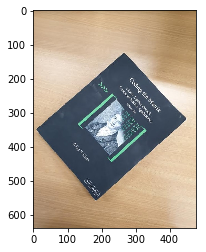

In [40]:
# If the cv2 import doesn't work, do the pre-requisite
import cv2
import numpy as np
import matplotlib.image
import matplotlib.pyplot as plt

# Read in the image.
im_src = cv2.imread("book_la.jpg")

#save the image as .png as matplotlib needs it in .png format
cv2.imwrite('book_la.png',im_src)

print("Source image shape:")
print(im_src.shape)
#print(im_src.size)
print("")


#read the image using matplotlib
mt_im_src = matplotlib.image.imread('book_la.png')

#display the source image
print("Source image:")
plot1 = plt.imshow(mt_im_src)

In [41]:
# Destination image
size = (300,400,3)


im_dst = np.zeros(size, np.uint8)


pts_dst = np.array(
                   [
                    [0,0],
                    [size[0] - 1, 0],
                    [size[0] - 1, size[1] -1],
                    [0, size[1] - 1 ]
                    ], dtype=float
                   )

# Specify the cor-ordinates of the 4 corners of the book
pts_src = np.array([[266,127], [449,318], [184,556], [12,349]])


# Calculate the homography
h, status = cv2.findHomography(pts_src, pts_dst)

# Warp source image to destination
# im_dst = cv2.warpPerspective(im_src, h, size[0:2]) # Doesn't work with the latest version of numpy
im_dst = cv2.warpPerspective(im_src, h, (int(size[0]), int(size[1])))

cv2.imwrite('final_Perspective.png',im_dst)

final_image=matplotlib.image.imread('final_Perspective.png')

print("Shape of the image after perspective rectification:")
print("Final shape: "), final_image.shape


Shape of the image after perspective rectification:
Final shape: 


(None, (400, 300, 3))

With perspective correction:


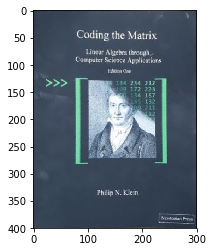

In [37]:
# Display the image with perspective corrected
print("With perspective correction:")
imgplotfinalP=plt.imshow(final_image)